In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('topotests/')
from topotests.topotests import TopoTestOnesample
from sklearn.mixture import GaussianMixture

In this notebook, we look at the location of different crimes in Chicago. 
The data can be downloaded as a csv from https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6.

In [2]:
df = pd.read_csv('Crimes_-_Map.csv')
crime_types=df[' PRIMARY DESCRIPTION'].unique()
print(crime_types)

['THEFT' 'CRIMINAL DAMAGE' 'DECEPTIVE PRACTICE' 'NARCOTICS'
 'MOTOR VEHICLE THEFT' 'BURGLARY' 'OTHER OFFENSE' 'PUBLIC PEACE VIOLATION'
 'SEX OFFENSE' 'STALKING' 'BATTERY' 'ASSAULT' 'CRIMINAL SEXUAL ASSAULT'
 'ROBBERY' 'WEAPONS VIOLATION' 'HOMICIDE' 'CRIMINAL TRESPASS'
 'OFFENSE INVOLVING CHILDREN' 'OBSCENITY' 'INTIMIDATION'
 'LIQUOR LAW VIOLATION' 'KIDNAPPING' 'ARSON' 'OTHER NARCOTIC VIOLATION'
 'INTERFERENCE WITH PUBLIC OFFICER' 'HUMAN TRAFFICKING' 'PROSTITUTION'
 'CONCEALED CARRY LICENSE VIOLATION' 'GAMBLING' 'NON-CRIMINAL'
 'PUBLIC INDECENCY']


In [3]:
crime_1 = 'ARSON'
crime_2 = 'HOMICIDE'

X = np.array(df[df[' PRIMARY DESCRIPTION']==crime_1][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
Y = np.array(df[df[' PRIMARY DESCRIPTION']==crime_2][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF462937,11/03/2022 07:00:00 PM,031XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,N,N,912,12.0,06,NaN,NaN,NaN,NaN,NaN
1,JF463363,11/03/2022 09:00:00 PM,025XX N ELSTON AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1432,1.0,06,NaN,NaN,NaN,NaN,NaN
2,JF461531,11/03/2022 01:00:00 PM,028XX N MERRIMAC AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,N,N,2511,30.0,14,NaN,NaN,NaN,NaN,NaN
3,JF502909,12/08/2022 11:30:00 AM,021XX N ELSTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),N,N,1432,32.0,11,NaN,NaN,NaN,NaN,NaN
4,JF491558,11/18/2022 04:50:00 AM,007XX S Wells St,0810,THEFT,OVER $500,RESIDENCE - GARAGE,N,N,123,25.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257288,JG364916,07/31/2023 12:00:00 AM,064XX S RHODES AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,N,Y,312,20.0,04B,1181010.0,1862410.0,41.777700,-87.611960,"(41.777700447, -87.611960085)"
257289,JG149582,01/28/2023 11:31:00 PM,038XX W 59TH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,N,N,822,23.0,11,1151739.0,1865206.0,41.785997,-87.719196,"(41.785996793, -87.719195501)"
257290,JG305358,06/18/2023 01:05:00 AM,012XX N STATE PKWY,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,Y,Y,1824,2.0,04B,1176068.0,1908513.0,41.904323,-87.628691,"(41.904322962, -87.628690783)"
257291,JF529073,12/31/2022 04:00:00 PM,024XX E 79TH ST,0560,ASSAULT,SIMPLE,RESTAURANT,N,N,422,7.0,08A,1193792.0,1853060.0,41.751740,-87.565408,"(41.751739567, -87.565407903)"


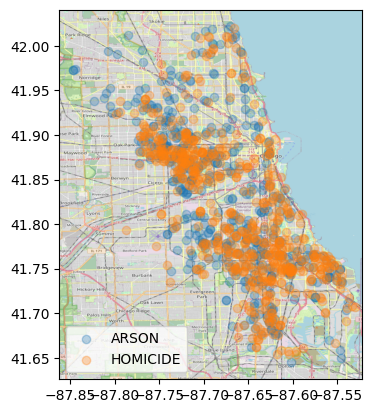

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('map.png')

f,ax = plt.subplots()
ax.imshow(img, extent=(-87.8619661657, -87.5222528643,41.62575073075,42.04070276825))
ax.scatter(X[:,0],X[:,1], alpha=0.3, label=crime_1)
ax.scatter(Y[:,0],Y[:,1], alpha=0.3,label=crime_2)
ax.set_xlim((-87.8619661657, -87.5222528643))
ax.legend()
plt.show()


# 1 sample test
Let us fit a Gaussian mixture with two components. Is this a good model for the distribution of homicide?

In [5]:
gmm = GaussianMixture(n_components=2)
gmm.fit(Y)

GaussianMixture(n_components=2)

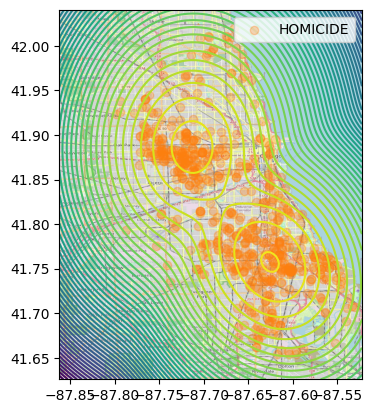

In [6]:

x = np.linspace(-87.8619661657, -87.5222528643, 100)
y = np.linspace(41.62575073075, 42.04070276825, 100)

xx, yy = np.meshgrid(x, y)
pos = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis = 1)
z = gmm.score_samples(pos)
z = z.reshape(xx.shape)

f,ax = plt.subplots()
ax.imshow(img, extent=(-87.8619661657, -87.5222528643,41.62575073075,42.04070276825))
ax.contour(x, y, z, 50, cmap="viridis")
ax.scatter(Y[:,0],Y[:,1], alpha=0.3,label=crime_2,color='tab:orange')
ax.legend()
plt.show()

In [7]:
from distributions import GaussianMixtureMulti
my_gaussian_mixture = GaussianMixtureMulti(gmm.means_,gmm.covariances_,gmm.weights_)

In [8]:
n = len(Y)
alpha=0.05
tt = TopoTestOnesample(n=n, dim=2, significance_level=alpha)
tt.fit(rv=my_gaussian_mixture, n_signature=1000)

In [9]:
from scipy.stats import kstest


print(tt.predict(Y))
print(tt.predict(Y).statistic*np.sqrt(n))
print(tt.representation_threshold*np.sqrt(n))


TopoTestResult(statistic=0.21425727411944928, pvalue=0.0)
5.4751013892029645
1.5733491002652586


Our TopoTest rejects the hypothesis that homicide cases are indeed following our Gaussian mixture model.
We can also have a look at the empirical ECC vs. the expected one under the null hypothesis.

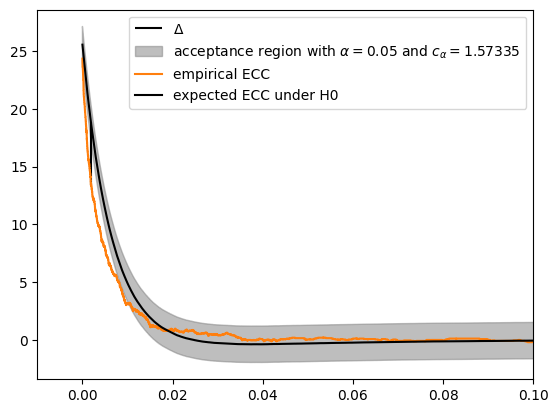

In [15]:
f,ax = plt.subplots()
ecc_trafo = tt.representation.transform([Y])
loc = np.argmax(np.abs(tt.representation.representation-ecc_trafo[1][0]))
val = np.max(np.abs(tt.representation.representation-ecc_trafo[1][0]))
ax.vlines(x=tt.representation.xs[loc], ymin=np.sqrt(n)*ecc_trafo[1][0][loc],ymax =np.sqrt(n)*tt.representation.representation[loc], colors='k', ls='-', label='$\Delta$')
ax.fill_between(tt.representation.xs, np.sqrt(n)*(tt.representation.representation-tt.representation_threshold), np.sqrt(n)*(tt.representation.representation+tt.representation_threshold), label='acceptance region with $\\alpha=0.05$ and $c_\\alpha = {0:.5f}$'.format(np.sqrt(n)*tt.representation_threshold), color='tab:grey', alpha=0.5)
ax.plot(tt.representation.xs,np.sqrt(n)*ecc_trafo[1][0], label='empirical ECC', color='tab:orange')
ax.plot(tt.representation.xs,np.sqrt(n)*tt.representation.representation, label='expected ECC under H0',color='k')


ax.set_xlim((-0.01,0.1))
ax.legend()
plt.show()

In [13]:
tt.representation_threshold

0.061569908116385734

# 2 sample test
Let us test whether arson and homicide follow the same distribution.

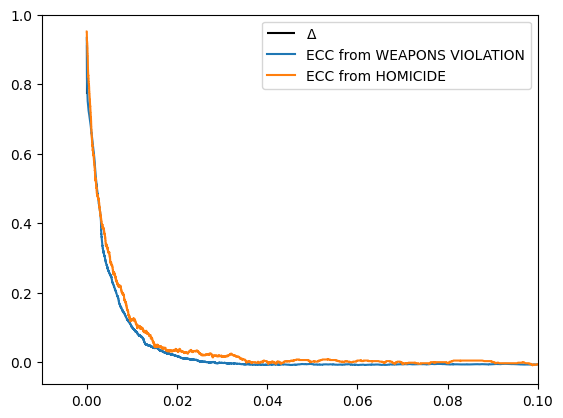

In [19]:
from ecc import ecc_representation
f,ax = plt.subplots()

ecc_rep = ecc_representation()
dists, eccs = ecc_rep.fit_transform(samples=[X,Y])
loc = np.argmax(np.abs(eccs[1]-eccs[0]))
val = np.max(np.abs(eccs[1]-eccs[0]))
ax.vlines(x=ecc_rep.xs[loc], ymin=eccs[0][loc],ymax =eccs[1][loc], colors='k', ls='-', label='$\Delta$')
ax.plot(ecc_rep.xs,eccs[0], label=f'ECC from {crime_1}')
ax.plot(ecc_rep.xs,eccs[1], label=f'ECC from {crime_2}')

ax.set_xlim((-0.01,0.1))

ax.legend()

plt.show()

In [20]:
from topotests.topotests import TopoTestTwosample
print(TopoTestTwosample(X1=X, X2=Y))

TopoTestResult(statistic=0.05598158226252259, pvalue=0.966)


Thus, we also have evidence to reject the hypothesis that the locations of arson and homicide cases follow the same distribution.

In [20]:
#all-to-all test with bonferroni correction
for i in range(len(crime_types)):
    for j in range(i):
        X1 = np.array(df[df[' PRIMARY DESCRIPTION']==crime_types[i]][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
        X2 = np.array(df[df[' PRIMARY DESCRIPTION']==crime_types[j]][['LONGITUDE','LATITUDE']].dropna().loc[(df!=0).any(axis=1)])
        N = np.min([len(X1), len(X2),500])
        ttts_result=TopoTestTwosample(X1=X1[:N],X2=X2[:N])
        if ttts_result.pvalue*2 > 0.05/(len(crime_types)*(len(crime_types)-1)):
            print(i, crime_types[i],j,crime_types[j],ttts_result.pvalue)


2 DECEPTIVE PRACTICE 1 CRIMINAL DAMAGE 0.708
4 MOTOR VEHICLE THEFT 1 CRIMINAL DAMAGE 0.112
4 MOTOR VEHICLE THEFT 2 DECEPTIVE PRACTICE 0.03
5 BURGLARY 1 CRIMINAL DAMAGE 0.028
5 BURGLARY 2 DECEPTIVE PRACTICE 0.004
5 BURGLARY 4 MOTOR VEHICLE THEFT 0.554
6 OTHER OFFENSE 1 CRIMINAL DAMAGE 0.022
6 OTHER OFFENSE 2 DECEPTIVE PRACTICE 0.026
6 OTHER OFFENSE 4 MOTOR VEHICLE THEFT 0.07
6 OTHER OFFENSE 5 BURGLARY 0.444
7 PUBLIC PEACE VIOLATION 1 CRIMINAL DAMAGE 0.09
7 PUBLIC PEACE VIOLATION 2 DECEPTIVE PRACTICE 0.008
8 SEX OFFENSE 1 CRIMINAL DAMAGE 0.068
8 SEX OFFENSE 2 DECEPTIVE PRACTICE 0.024
8 SEX OFFENSE 4 MOTOR VEHICLE THEFT 0.716
8 SEX OFFENSE 5 BURGLARY 0.736
8 SEX OFFENSE 6 OTHER OFFENSE 0.156
9 STALKING 1 CRIMINAL DAMAGE 0.174
9 STALKING 2 DECEPTIVE PRACTICE 0.624
9 STALKING 4 MOTOR VEHICLE THEFT 0.07
9 STALKING 5 BURGLARY 0.28
9 STALKING 6 OTHER OFFENSE 0.494
9 STALKING 7 PUBLIC PEACE VIOLATION 0.002
9 STALKING 8 SEX OFFENSE 0.49
10 BATTERY 0 THEFT 0.102
11 ASSAULT 1 CRIMINAL DAMAGE 0.098